# SALARY PREDICTION

## DEFINE

### PROBLEM DEFINITION

This dataset consists of 1 million jobs and their estimated salaries based on features like<br>
<b>JOB TYPE</b> - Janitor, Manager, CEO, CFO etc.<br>
<b>DEGREE</b> - High school, College, Master's etc. <br>
<b>MAJOR</b> - Physics, Biology, Maths etc.<br>
<b>INDUSTRY</b> - Health, Finance, Oil etc.<br>
<b>YEARS_OF_EXPERIENCE</b>  - Candidate experience in years<br>
<b>MILES_FROM_METROLPOLIS</b> - Distance from the metropolis<br>
Every row(job) has a unique <b>JOB_ID</b>, there is a column, <b>COMPANY_ID</b> which is the company id.  
<H3>The task here is to:</H3><br> - Load the data, Understand the data, Find relationships between attributes <br>- Establish a baseline model, Engineer features, Optimize the data features <br>- Select the best model with the lowest Evaluation metric and <br>- <b>Predict salaries of another 1 million job features using the selected model</b>


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

__author__ = "Sushant Wavhal"
__email__ = "sushantw71@gmail.com"

## DISCOVER

### Loading Data

In [2]:
#load the data into a Pandas dataframe

In [3]:
train_features = pd.read_csv('data/train_features.csv')
train_salaries = pd.read_csv('data/train_salaries.csv')
test_features = pd.read_csv('data/test_features.csv')

### Exploring the Data

In [4]:
train_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [5]:
train_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [6]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [7]:
train_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [8]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [20]:
train_features['jobId'].nunique()

1000000

In [19]:
train_features['companyId'].nunique()

63

In [14]:
train_features['jobType'].value_counts()

SENIOR            125886
VICE_PRESIDENT    125235
MANAGER           125121
CTO               125046
JANITOR           124971
CEO               124778
JUNIOR            124594
CFO               124369
Name: jobType, dtype: int64

In [15]:
train_features['degree'].value_counts()

HIGH_SCHOOL    236976
NONE           236854
BACHELORS      175495
DOCTORAL       175364
MASTERS        175311
Name: degree, dtype: int64

In [16]:
train_features['major'].value_counts()

NONE           532355
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58596
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57801
Name: major, dtype: int64

In [17]:
train_features['industry'].value_counts()

WEB          143206
AUTO         142943
FINANCE      142867
EDUCATION    142819
OIL          142771
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64

<H3>Key Findings:</H3><br>
1. 1000000 rows of data<br>
2. 3 numerical features (yearsExperience, milesFromMetropolis & salary)<br>
3. 4 categorical features (jobType, degree, major, industry)<br>
5. Unique identifier - jobId<br>
6. 


In [291]:
#Merge train features dataframe and train salaries dataframe on jobId
train_df=pd.merge(train_features,train_salaries,on='jobId')
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [292]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


### ---- 3 Clean the data ----

In [11]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

In [293]:
train_df.duplicated().sum()

0

In [294]:
test_features.duplicated().sum()

0

In [295]:
#Check for null values
(train_df.salary<=0).sum()

5

In [296]:
#Remove those entries with salary<=0
train_df.drop(train_df[train_df['salary'] <= 0].index, inplace = True)

In [297]:
train_df.shape

(999995, 9)

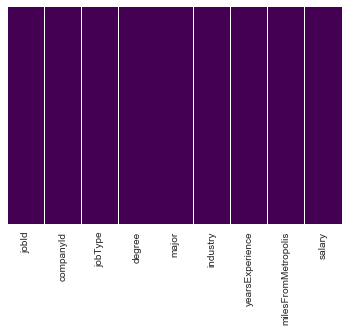

In [298]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### ---- 4 Explore the data (EDA) ----

In [17]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

In [299]:
train_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [300]:
print('Columnwise Unique values : \n')
for col in train_df:          
    print(col," ---", train_df[col].nunique())
    


Columnwise Unique values : 

jobId  --- 999995
companyId  --- 63
jobType  --- 8
degree  --- 5
major  --- 9
industry  --- 7
yearsExperience  --- 25
milesFromMetropolis  --- 100
salary  --- 279


In [301]:
pd.pivot_table(data=train_df, index='jobType', columns = 'industry',values='salary', aggfunc='mean')

industry,AUTO,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,WEB
jobType,,,,,,,
CEO,139.126480,128.306144,159.916932,145.115908,160.464799,133.350280,150.710337
CFO,128.866016,118.775361,149.955314,134.687750,150.337443,124.122543,141.181463
CTO,128.759346,118.703032,150.041805,135.680892,150.113902,123.428858,141.603892
JANITOR,64.741013,55.204577,85.120400,70.309998,85.307827,60.205064,75.038813
JUNIOR,88.671121,78.878164,110.226984,95.122034,110.154901,83.558421,101.136843
MANAGER,108.540599,98.944513,129.955841,115.105228,130.233432,103.796372,120.930051
SENIOR,98.878101,88.832586,120.429226,105.141989,119.970093,93.949206,111.170494
VICE_PRESIDENT,118.674694,108.498984,140.078083,124.834675,140.323687,113.517558,131.446657


In [302]:
pd.pivot_table(data=train_df, index='jobType', columns = 'industry',values='salary', aggfunc='sum')

industry,AUTO,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,WEB
jobType,,,,,,,
CEO,2491477,2288725,2864592,2557813,2869592,2360700,2698770
CFO,2269846,2096979,2677902,2421147,2658417,2190887,2531666
CTO,2290500,2126090,2666693,2397210,2713609,2214684,2532444
JANITOR,1170647,986561,1515058,1245401,1509522,1074841,1347547
JUNIOR,1579410,1417835,1957521,1707821,1927160,1483914,1804079
MANAGER,1965019,1758244,2333747,2041161,2328704,1853907,2154127
SENIOR,1761810,1605649,2155924,1886773,2182256,1692401,1994621
VICE_PRESIDENT,2114071,1923036,2507958,2264501,2507023,2026856,2356970


In [303]:
pd.pivot_table(data=train_df, index='degree', columns = 'industry',values='salary', aggfunc='sum')

industry,AUTO,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,WEB
degree,,,,,,,
BACHELORS,2980937,2714817,3518514,3136375,3513937,2838091,3313995
DOCTORAL,3231318,2965191,3778689,3392114,3796814,3038426,3557417
HIGH_SCHOOL,3217256,2939153,3923393,3439170,3949698,3068812,3615267
MASTERS,3081719,2807460,3644871,3279689,3636496,2966941,3461769
NONE,3131550,2776498,3813928,3274479,3799338,2985920,3471776


In [304]:
pd.pivot_table(data=train_df, index='major', columns = 'industry',values='salary', aggfunc='sum')

industry,AUTO,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,WEB
major,,,,,,,
BIOLOGY,995667,920432,1157473,1182651,1166206,966272,1079880
BUSINESS,1040641,969751,1376017,1082327,1283098,1084280,1101793
CHEMISTRY,1020532,929179,1189301,1190301,1180305,972796,1116705
COMPSCI,1050834,969736,1220791,1090527,1223587,1009655,1145708
ENGINEERING,1130222,957600,1305028,1059865,1360896,999983,1298238
LITERATURE,996076,964369,1163859,1023981,1163883,916380,1073097
MATH,1045880,940519,1206687,1086434,1214331,971876,1240287
NONE,7328114,6617387,8880687,7731110,8910106,6988253,8155171
PHYSICS,1034814,934146,1179552,1074631,1193871,988695,1209345


### Finding outliers using IQR

In [305]:
salary_data = train_df['salary'].describe()
print(data)

IQR = salary_data['75%'] - salary_data['25%']

upperbound = salary_data['75%'] + 1.5 * IQR

lowerbound = salary_data['25%'] - 1.5 * IQR

print('\n')
print('Upper bound: {}, Lower bound: {}.'.format(upperbound, lowerbound))


count    999995.000000
mean        116.062398
std          38.717163
min          17.000000
25%          88.000000
50%         114.000000
75%         141.000000
max         301.000000
Name: salary, dtype: float64


Upper bound: 220.5, Lower bound: 8.5.


In [306]:
train_df = train_df[train_df['salary'] > 8.5]

In [307]:
train_df.shape

(999995, 9)

In [308]:
train_df[(train_df.salary>220.5) & (train_df.jobType == "JUNIOR")]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


In [101]:
#Visualize target variable distribution and boxplot

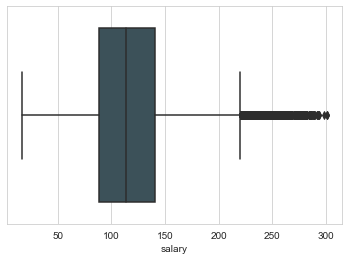

In [108]:
sns.boxplot(train_df['salary'])

## DISTRIBUTION OF CATEGORICAL VALUES

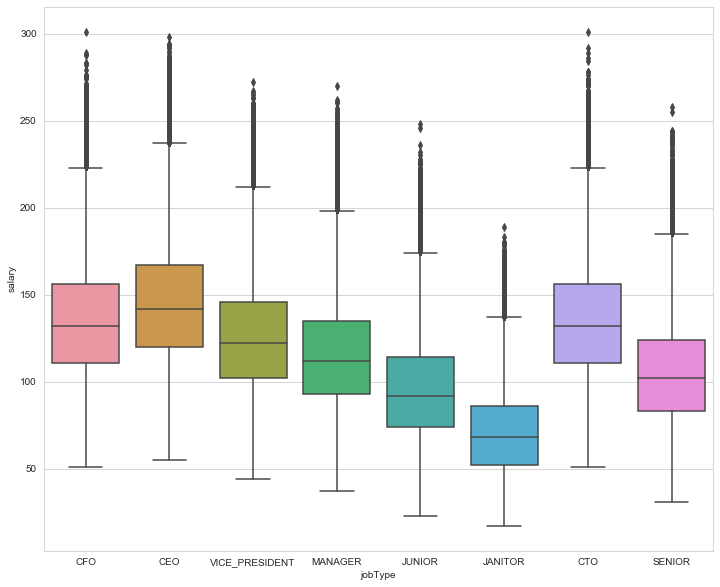

In [125]:
plt.figure(figsize=(12,10))

sns.boxplot(x='jobType',y='salary',data=train_df)

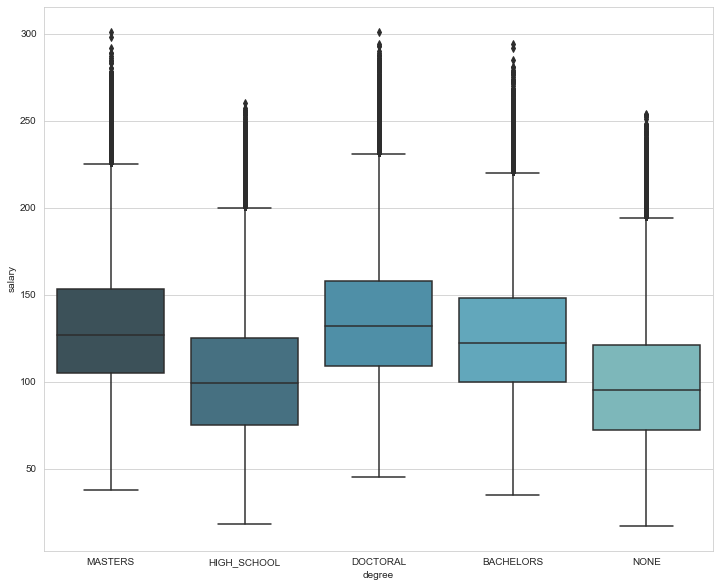

In [126]:
plt.figure(figsize=(12,10))
sns.boxplot(x='degree',y='salary',data=train_df)

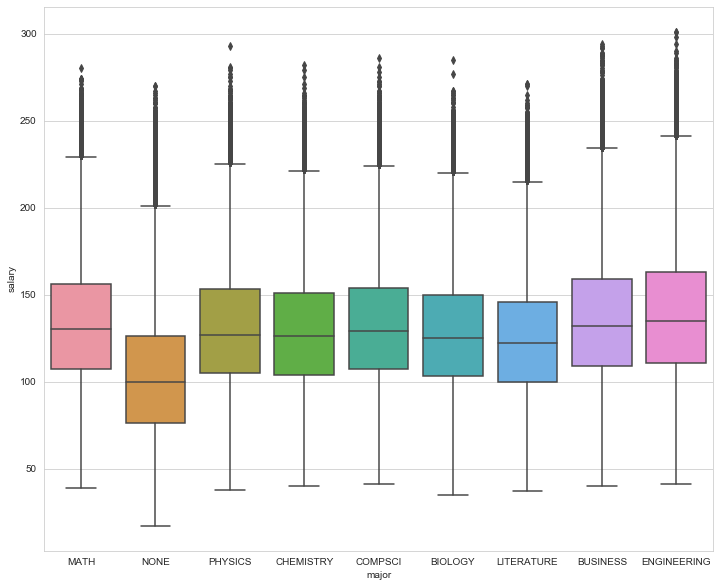

In [127]:
plt.figure(figsize=(12,10))
sns.boxplot(x='major',y='salary',data=train_df)

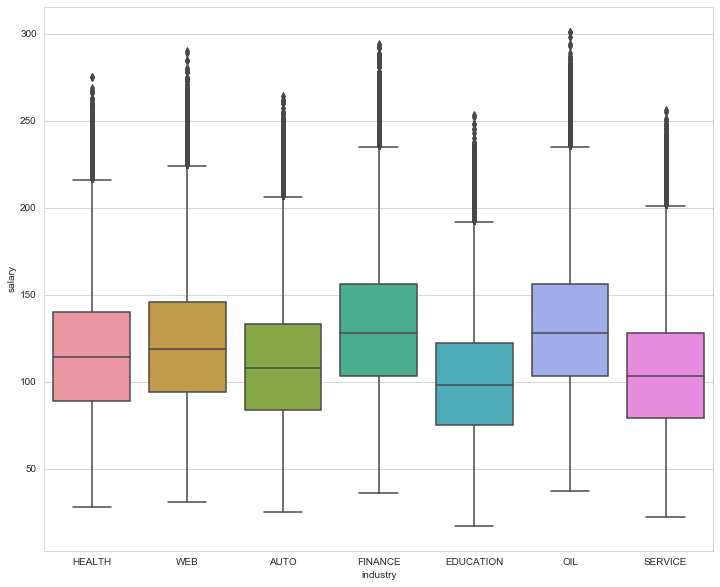

In [128]:
plt.figure(figsize=(12,10))
sns.boxplot(x='industry',y='salary',data=train_df)

## DISTRIBUTION OF NUMERICAL VARIABLES

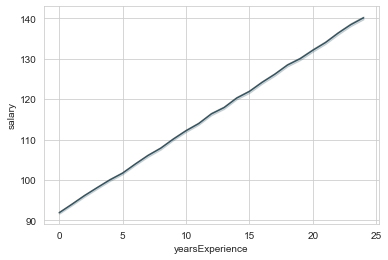

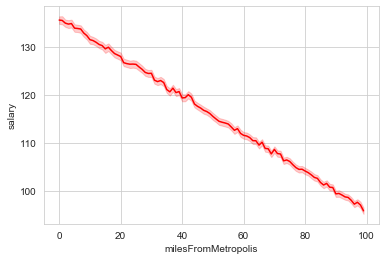

In [129]:

#drawing lineplots
sns.lineplot(x='yearsExperience', y='salary', data=train_df)
plt.show()

sns.lineplot(x='milesFromMetropolis', y='salary', data=train_df, color="red")
plt.show()

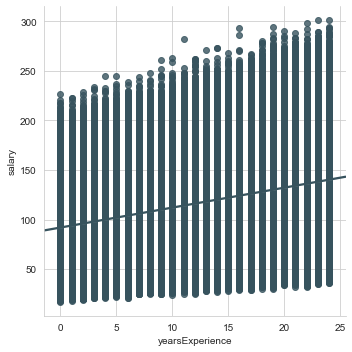

In [130]:
sns.lmplot(x='yearsExperience',y='salary',data=train_df)

### ---- 5 Establish a baseline ----

In [20]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

In [164]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  999995 non-null object
companyId              999995 non-null object
jobType                999995 non-null object
degree                 999995 non-null object
major                  999995 non-null object
industry               999995 non-null object
yearsExperience        999995 non-null int64
milesFromMetropolis    999995 non-null int64
salary                 999995 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [309]:
train_feat = train_df[['companyId','jobType','degree','major','industry','yearsExperience','milesFromMetropolis']]

In [310]:
train_target = train_df[['salary']]

### Encoding categorical variables

In [235]:
#labels = {"degree" : {"NONE":1, "HIGH_SCHOOL":2, "BACHELORS":3, "MASTERS":4, "DOCTORAL":5},
#"jobType" : {"JANITOR":1,"JUNIOR":2,"SENIOR":3,"MANAGER":4,"VICE_PRESIDENT":5,"CFO":6,"CTO":7,"CEO":8},
#"major": {"NONE":1,"BIOLOGY":2,"BUSINESS":3,"CHEMISTRY":4,"COMPSCI":5,"ENGINEERING":6,"LITERATURE":7,"MATH":8,"PHYSICS":9},
#"industry" :{"AUTO":1,"EDUCATION":2,"FINANCE":3,"HEALTH":4,"OIL":5,"SERVICE":6,"WEB":7}
#}

In [283]:
#train_df.replace(labels,inplace=True)
#train_df.head()

In [ ]:
#train_df = train_df.drop(columns=['jobId'])

In [284]:
#train_df.head()

In [282]:
#corr_mat = train_df.corr()
#plt.figure(figsize=(20, 10))

#ax = sns.heatmap(corr_mat, annot=True,linewidth=0.1,linecolor = "white") #notation: "annot" not "annote"
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)

### Getting dummies for categorical variables

In [311]:
CompanyId = pd.get_dummies(train_df['companyId'],drop_first=True)
JobType = pd.get_dummies(train_df['jobType'],drop_first=True)
Degree = pd.get_dummies(train_df['degree'],drop_first=True)
Major = pd.get_dummies(train_df['major'],drop_first=True)
Industry = pd.get_dummies(train_df['industry'],drop_first=True)

### Concatenating these dummies to the dataframe

In [312]:
train_df = pd.concat([train_df,CompanyId],axis=1)
train_df = pd.concat([train_df,JobType],axis=1)
train_df = pd.concat([train_df,Degree],axis=1)
train_df = pd.concat([train_df,Major],axis=1)
train_df = pd.concat([train_df,Industry],axis=1)

### Dropping the original columns

In [ ]:
train_df =train_df.drop(columns=['companyId'])
train_df =train_df.drop(columns=['jobType'])
train_df =train_df.drop(columns=['degree'])
train_df =train_df.drop(columns=['major'])
train_df =train_df.drop(columns=['industry'])

In [317]:
train_df =train_df.drop(columns=['jobId'])

In [318]:
train_df.head()

,yearsExperience,milesFromMetropolis,salary,COMP1,COMP10,COMP11,COMP12,COMP13,COMP14,COMP15,...,LITERATURE,MATH,NONE,PHYSICS,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,WEB
0,10,83,130,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,3,73,101,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,10,38,137,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,8,17,142,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,16,163,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [281]:
#test_features.replace(labels,inplace=True)
#CompanyId = pd.get_dummies(test_features['companyId'],drop_first=True)
#test_features = pd.concat([test_features,CompanyId],axis=1)
#test_features =test_features.drop(columns=['companyId'])
#test_features.head()
#test_features = test_features.drop(columns=['jobId'])
#test_df = test_features

In [319]:
X = train_df.drop(columns=['salary'])
y = train_df['salary']


In [320]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [327]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [321]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [322]:
lm = LinearRegression()

In [328]:
rf = RandomForestRegressor(n_estimators=200, n_jobs=2, max_depth=30, \
                           min_samples_split=60, max_features='auto', verbose=0)


In [329]:
gbr = GradientBoostingRegressor(n_estimators=160, max_depth=6, loss='ls',verbose=0)

### Linear Regression

In [323]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [324]:
salary_pred = lm.predict(X_test)

In [325]:
rms = mean_squared_error(y_test, salary_pred)
print(rms)

384.9103725940502


### Random Forest Regressor

In [330]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=60,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=2,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [331]:
predictions = rf.predict(X_test)

In [332]:
rms = mean_squared_error(y_test, predictions)
print(rms)

373.11807191573206


### Gradient Boosting Regressor

In [333]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=160,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [335]:
pred = gbr.predict(X_test)

In [336]:
rms = mean_squared_error(y_test, pred)
print(rms)

357.8339079789738


### ---- 6 Hypothesize solution ----

In [21]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [22]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [23]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [24]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [25]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [26]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [27]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data